In [1]:
import time

from vivarium.experimental.environments.braitenberg.simple import BraitenbergEnv
from vivarium.experimental.environments.braitenberg.utils import render, render_history

2024-06-03 15:31:30.391184: W external/xla/xla/service/gpu/nvptx_compiler.cc:760] The NVIDIA driver's CUDA version is 12.2 which is older than the ptxas CUDA version (12.5.40). Because the driver is older than the ptxas version, XLA is disabling parallel compilation, which may slow down compilation. You should update your NVIDIA driver or use the NVIDIA-provided CUDA forward compatibility packages.


In [2]:
env = BraitenbergEnv()
state = env.init_state()

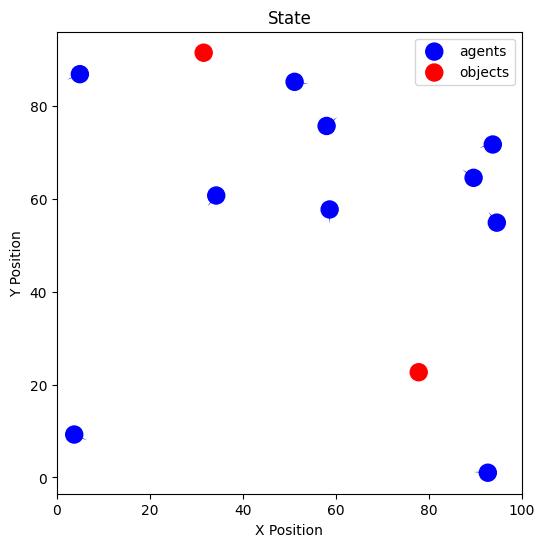

In [3]:
render(state)

In [4]:
n_steps = 1000
hist = []

for i in range(n_steps):
    state = env.step(state)
    hist.append(state)

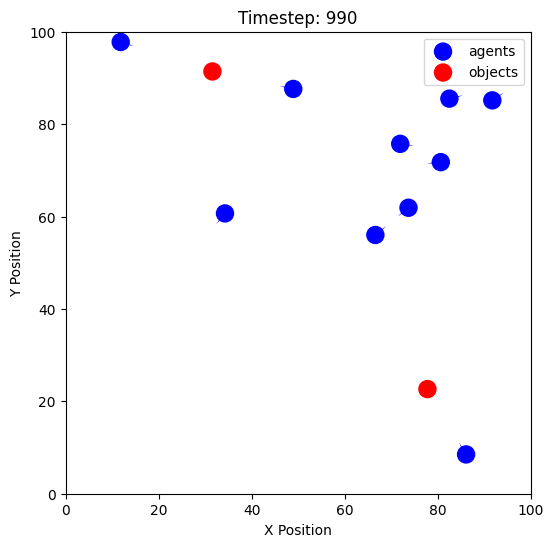

In [5]:
render_history(hist, skip_frames=10)

## Scale the size of the simulation

Launch a simulation with a bigger box size, as well as more agents and objects.

In [9]:
env = BraitenbergEnv(
    box_size=1000,
    max_agents=100,
    max_objects=50,
    existing_agents=90,
    existing_objects=30,
    prox_dist_max=100
) 
 
state = env.init_state()  

n_steps = 20_000

hist = []

start = time.perf_counter()
for i in range(n_steps):
    state = env.step(state) 
    hist.append(state)
end = time.perf_counter()
print(f"Simulation ran in {end - start} for {n_steps} timesteps")

Simulation ran in 13.888845541001501 for 20000 timesteps


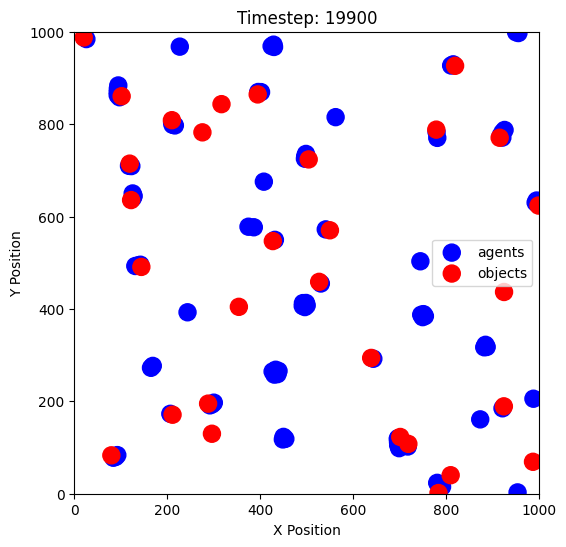

In [10]:
render_history(hist, skip_frames=100)
# (Need to update the rendering of the env because the sizes aren't accurate)

## Test neighbors rebuilding time

In the last run we see that there is a rebuilding of neighbors. To test (really roughly) how long it took, we just reduce the prox_dist_max of agents (set it to 10 which is really small). This way the original neighbor lists are the same, and because most of the agents will remain static and there won't be neighbor buffer overflow. 

In [11]:
env = BraitenbergEnv(box_size=1000,
                     max_agents=100,
                     max_objects=50,
                     existing_agents=90,
                     existing_objects=30,
                     prox_dist_max=10) 
 
state = env.init_state()  

hist = []

start = time.perf_counter()
for i in range(n_steps):
    state = env.step(state) 
    hist.append(state)
end = time.perf_counter()
print(f"Simulation ran in {end - start} for {n_steps} timesteps")

Simulation ran in 12.980394261001493 for 20000 timesteps
